### Questions
* None for now


### Outline
* take questions
* mock up some data
* begin exploring my data
* create functions

### Objectives
YWBAT
* create functions for repetitive tasks in python
* learn how to pass arguments into functions
* turn a process into a function


### Helpful Tips
* Talk while you code
* Add comments
* Create informative variable names
* Create examples and work first

# Question 1: Global Variables 

In [17]:
x = 5 # lives in memory on jupyter kernel
print(x)

5


In [27]:
global x

In [28]:
x = 12

In [31]:
def f():
    global x 
    x += 5
    print(x)

In [32]:
f()

17


# Mutability and Imutability 
### an object is mutable iff when changing the object the object can be changed in memory without overwriting the object

In [37]:
lst1 = []

In [38]:
id(lst1)

4452111304

In [40]:
lst1.append(14)
id(lst1)

4452111304

In [41]:
s = set()
id(s)

4468406088

In [42]:
s.add(4)
id(s)

4468406088

# Or vs And

In [43]:
v1 = True
v2 = False
v3 = True

In [44]:
# Or returns: v1 if v1 is true else v2

v1 or v2

True

In [45]:
v2 or v1

True

In [46]:
v2 or 144

144

In [52]:
v2 or (144 or v2)
# v2 is False
# 144 -> Truthy

144

In [53]:
# and returns: v1 if v1 is false else v2

v1 and v2

False

In [54]:
v1 and 144

144

In [55]:
# fun time!
v1 = True
v2 = False
v3 = True


v2 or (v1 and (v2 or 144))

v2 or (v1 and 144)
v2 or 144
144

144

# While loops

In [63]:
# find the divisors of a number
# 6 -> [1, 2, 3, 6]

n = 28
divisors = []
d = 1
while True:
    if n%d==0:
        divisors.append(d)
    if d == n:
        break
    d += 1
print(divisors)

[1, 2, 4, 7, 14, 28]


In [57]:
while n > 1:
    

0

In [80]:
# 
grabbed = []
names = ['blake', 'payson', 'thomas', 'ari', 'edward', 'erica', 'heather', 'jeremie']
numbers = [1, 2, 3, 2, 3, 6, 3,2 ,3, 2, 3, 2, 1, 3, 2, 3, 2]
letters = 'herearesomelettersthatiamtypingout'

In [81]:
for nm, nu, l in zip(names, numbers, letters): # (blake, 1, h), (payson, 2, e), (thomas, 3, r), 
    if nm.startswith("b") or nm.startswith("a"): # True, False, False
        tup = (nm, nu, l) # add to grabbed, -, -
        grabbed.append(tup) 
    elif nu > 2: # -, False, True
        tup = (nm, nu, l) # -, -, adds to grabbed, 
        grabbed.append(tup)
    elif l in 'aeiou': # -, True
        tup = (nm, nu, l) # -, add to grabbed
        grabbed.append(tup) 
grabbed

[('blake', 1, 'h'),
 ('payson', 2, 'e'),
 ('thomas', 3, 'r'),
 ('ari', 2, 'e'),
 ('edward', 3, 'a'),
 ('erica', 6, 'r'),
 ('heather', 3, 'e')]

In [23]:
def f():
    print(x)

In [24]:
f()

12


In [ ]:
def g():
    

In [30]:
import numpy as np
import pandas as pd

from collections import Counter, defaultdict 

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

### Let's mock up some data

In [16]:
x = np.random.randint(0, 300, 10000)
x

array([102, 270, 106, ..., 233,  62, 195])

In [17]:
# calcualte the mean, median of our data

np.mean(x), np.median(x)

(149.0246, 149.0)

In [18]:
# how would I find the mean of x without numpy?
def my_mean(x):
    length = len(x)
    summ = sum(x)
    return summ/length

In [24]:
x_mean = my_mean(x)
x_mean_rounded = round(x_mean)
x_mean, x_mean_rounded

(149.0246, 149.0)

In [27]:
# floor
x_mean_floor = x_mean//1
x_mean_ceiling = x_mean//1 + 1
x_mean_floor, x_mean_ceiling, np.floor(x_mean), np.ceil(x_mean)

(149.0, 150.0, 149.0, 150.0)

In [38]:
# let's calculate mode

# convert to list
x_list = list(x)

# creating variables but we need placeholders
max_count = -10
max_num = None

for e in x_list: # e1, e2
    count = x_list.count(e) # count(e1), count(e2)
    if count > max_count: # count(e1) > -10, count(e2) > count(e1)
        # set element to max_num 
        max_num = e  # max_num = e1
        # update max_count
        max_count = count # max_count = count(e1)
        
max_num

270

In [51]:
def get_mode(x_list):
    # convert to list if it isn't a list
    if type(x_list) != list:
        x_list = list(x_list)

    # create a set of the numbers in our list
    unique_nums = set(x_list)

    # first find the max_count
    max_count = -1

    for n in unique_nums:
        count = x_list.count(n)
        if count > max_count:
            max_count = count

    # create mode list
    modes = []

    # second find all the numbers with a count of max_count
    for n in unique_nums:
        count = x_list.count(n)
        if count == max_count:
            modes.append(n)
    return modes

In [52]:
get_mode(x)

[270]

In [53]:
get_mode([1, 1, 1, 3, 3, 3, 4, 5, 6, 12, 12, 12, 5, 10, 10])

[1, 3, 12]

In [77]:
def get_median(x):
    median = None
    # sort our list
    x_sorted = sorted(x)

    # get length of list
    x_length = len(x)

    # if odd
    if x_length%2==1:
        index_of_median = x_length//2
        median = x_sorted[index_of_median]

    # if even
    else:
        index_of_upper_median = x_length//2
        index_of_lower_median = index_of_upper_median-1
        upper_med = x_sorted[index_of_upper_median]
        lower_med = x_sorted[index_of_lower_median]
        meds = [lower_med, upper_med]
        median = my_mean(meds)
    return median

In [78]:
case_even = [1, 2, 4, 5] # 3
case_odd = [1, 10, 20] # 10

get_median(case_even), get_median(case_odd)

(3.0, 10)

In [81]:
### Matplotlib Stuff
x = np.random.normal(0, 10, 10000)

In [115]:
def plot_hist(x, figsize=(8, 5), color='purple', plot_grid=False):
    plt.figure(figsize=figsize)
    if plot_grid:
        plt.grid(linestyle='dashed', zorder=0)
    sns.distplot(x, bins=20, color=color, norm_hist=False)
    plt.xlabel("data")
    plt.ylabel("PDF(data)")
    plt.title("PDF of Data")
    plt.show()

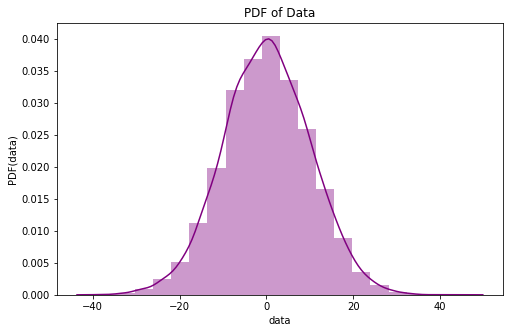

In [119]:
plot_hist(x)

### What have you learned/picked up? 
* nice to see the process (it's imperfect)
* I am definitely working on coding cleaner. If nothing else, it helps me to not lose my place in the middle of longer functions.
* how to use // to determine the middle element in a list
* I am definitely working on coding cleaner. If nothing else, it helps me to not lose my place in the middle of longer functions.
* I should start organizing better through comments
* space everything out, leaving comments everywhere
* I liked how you wrote a function that worked, then went back to make the code more readable, shorter, etc.. Made the logic simpler to read.
* scaling down the problem with smaller examples
* Good to have a habit of clean coding with an emphasis on readability.
* Definitely some structure/style principles that need to be applied when I write code.
* I learn that it is easier to write a function starting from an example and only indent (Tab) and make it a formal function at the end